In [8]:
import wget
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import math

df = pd.read_csv("Data_Source/LC_loans_2017-2018.csv")

In [10]:
df = df[df['annual_inc'].notna() & df['open_acc'].notna() & df['revol_util'].notna()    ]

In [11]:
df2 = df[df['annual_inc'] < 250000]

In [13]:
df2['int_rate'] = df2['int_rate'].astype('float')

C:\Users\luz44\AppData\Local\Temp\ipykernel_25856\2077167293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['int_rate'] = df2['int_rate'].astype('float')


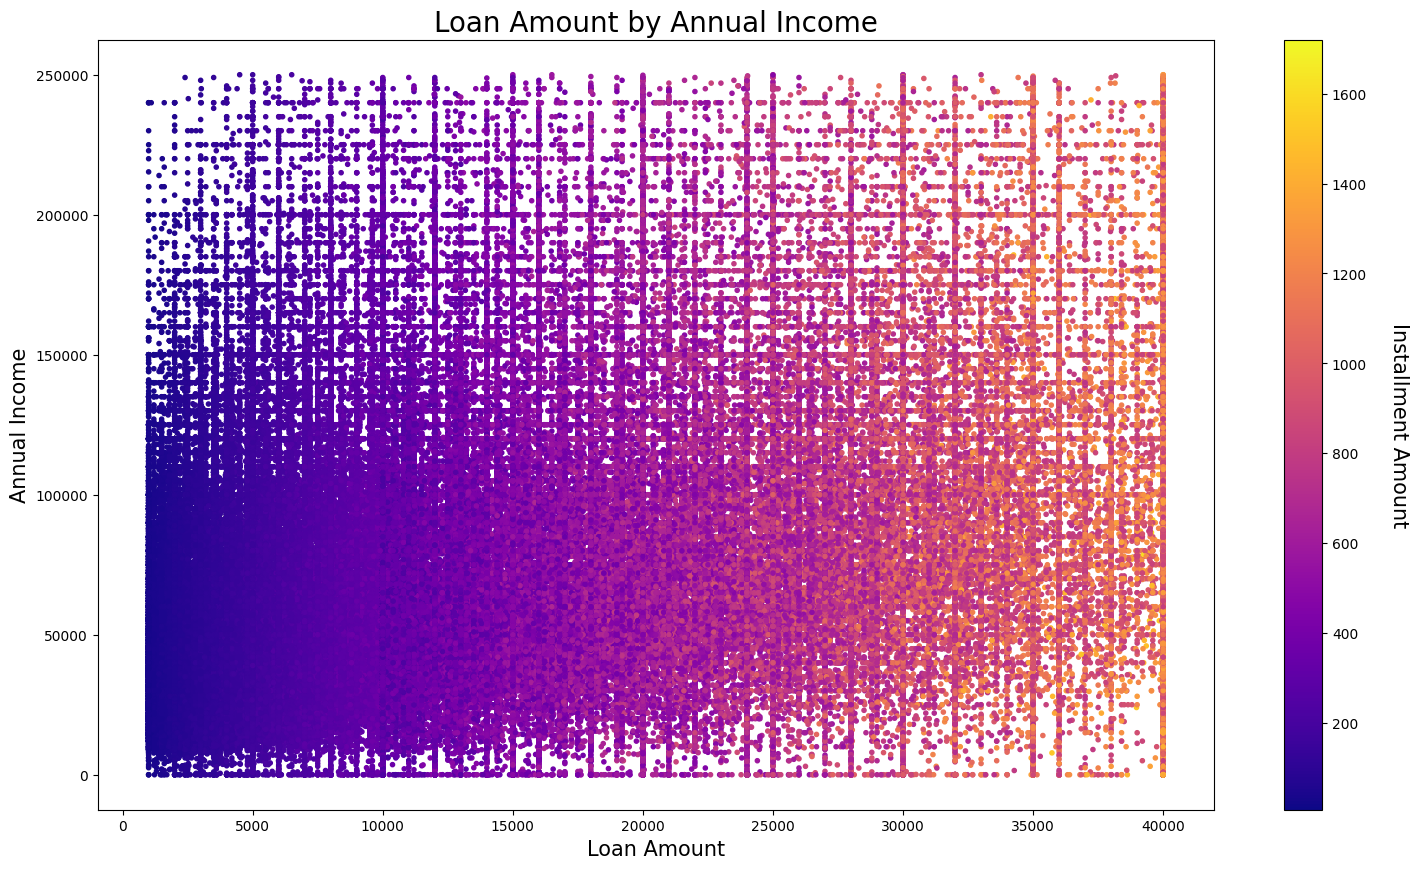

In [14]:
plt.figure(figsize=(18,10))
plt.scatter(df2['loan_amnt'], df2['annual_inc'], marker='.', cmap='plasma', c=df2['installment'])
plt.title('Loan Amount by Annual Income', fontsize=20)

cbar = plt.colorbar()
cbar.set_label('Installment Amount', rotation=270, fontsize=15, color='black', labelpad=30)

plt.xlabel('Loan Amount', fontsize=15)
plt.ylabel('Annual Income', fontsize=15)

plt.show()

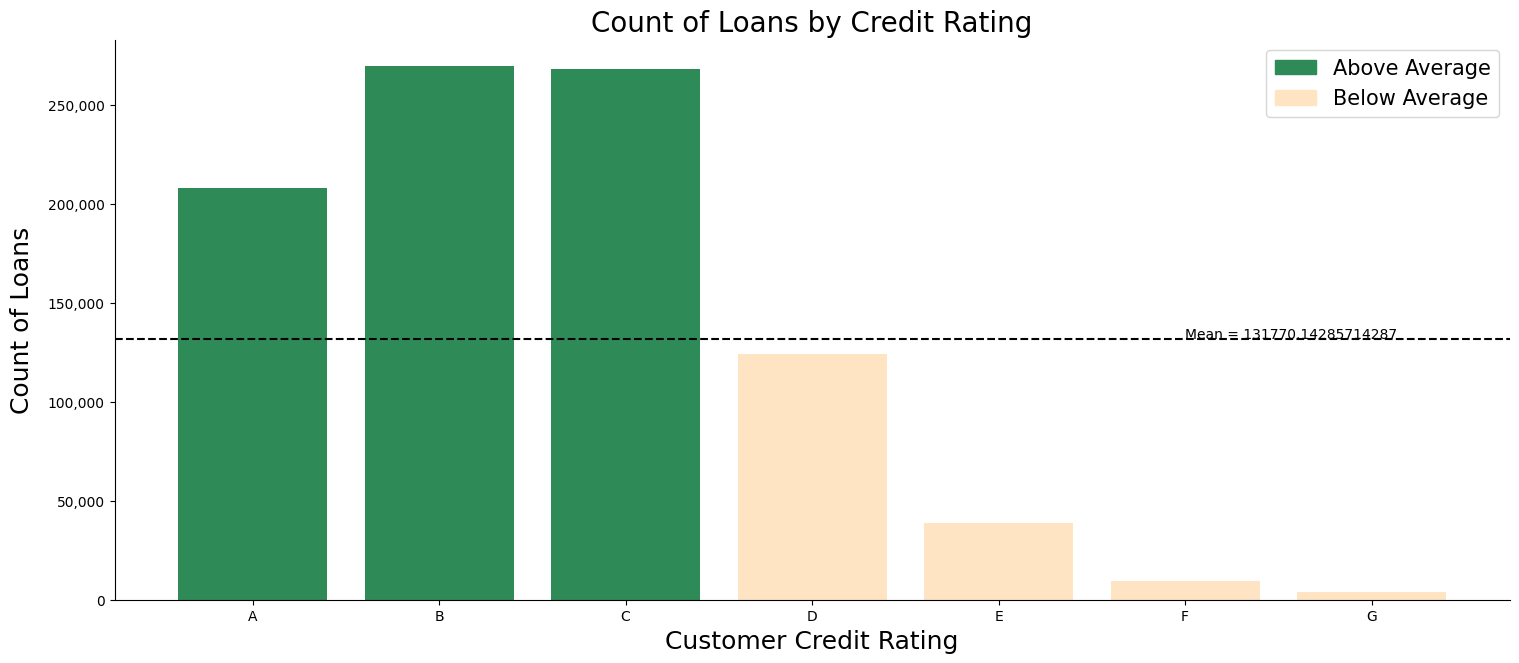

In [17]:
x1 = df2.groupby(['sub_grade']).agg({'sub_grade':['count'], 'loan_amnt':['sum', 'mean']}).reset_index()
x1.columns = ['SubGrade','Count', 'TotalLoans', 'AverLoans']
x1 = x1.sort_values('Count', ascending=False)
x2 = df2.groupby(['grade']).agg({'sub_grade':['count'], 'loan_amnt':['sum', 'mean'],'int_rate':['mean']}).reset_index()
x3 = df2.groupby(['grade']).agg({'sub_grade':['count'], 'loan_amnt':['sum', 'mean'], 'int_rate':['mean']}).reset_index()
x2.columns = ['Grade','Count', 'TotalLoans', 'AverLoans', 'AverIntRate']

def colors_by_mean(this_data):
    colors=[]
    avg = this_data.Count.mean()
    for each in this_data.Count:
        if each > avg*1.01:
            colors.append('seagreen')
        elif each < avg*0.99:
            colors.append('bisque')
        else:
            colors.append('seagreen')
    return colors


import matplotlib.patches as mpatches

top1 = 6
my_colors1 = colors_by_mean(x2)
fig = plt.figure(figsize=(18,16))



Above = mpatches.Patch(color='seagreen', label='Above Average')
Below = mpatches.Patch(color='bisque', label='Below Average')

ax1 = fig.add_subplot(2,1,1)
ax1.bar(x2.Grade, x2.Count, label='Count', color=my_colors1)
#ax1.legend(fontsize=15)

ax1.legend(handles=[Above, Below], fontsize=15)
plt.axhline(x2.Count.mean(), color='black', linestyle='dashed')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('Count of Loans by Credit Rating', size=20)
ax1.text(top1-1, x2.Count.mean()+300, 'Mean = ' + str(x2.Count.mean()))

ax1.set_xlabel('Customer Credit Rating', fontsize=18)
ax1.set_ylabel('Count of Loans', fontsize=18, labelpad=10)
ax1.yaxis.set_major_formatter(('{x:,.0f}'))

plt.show()

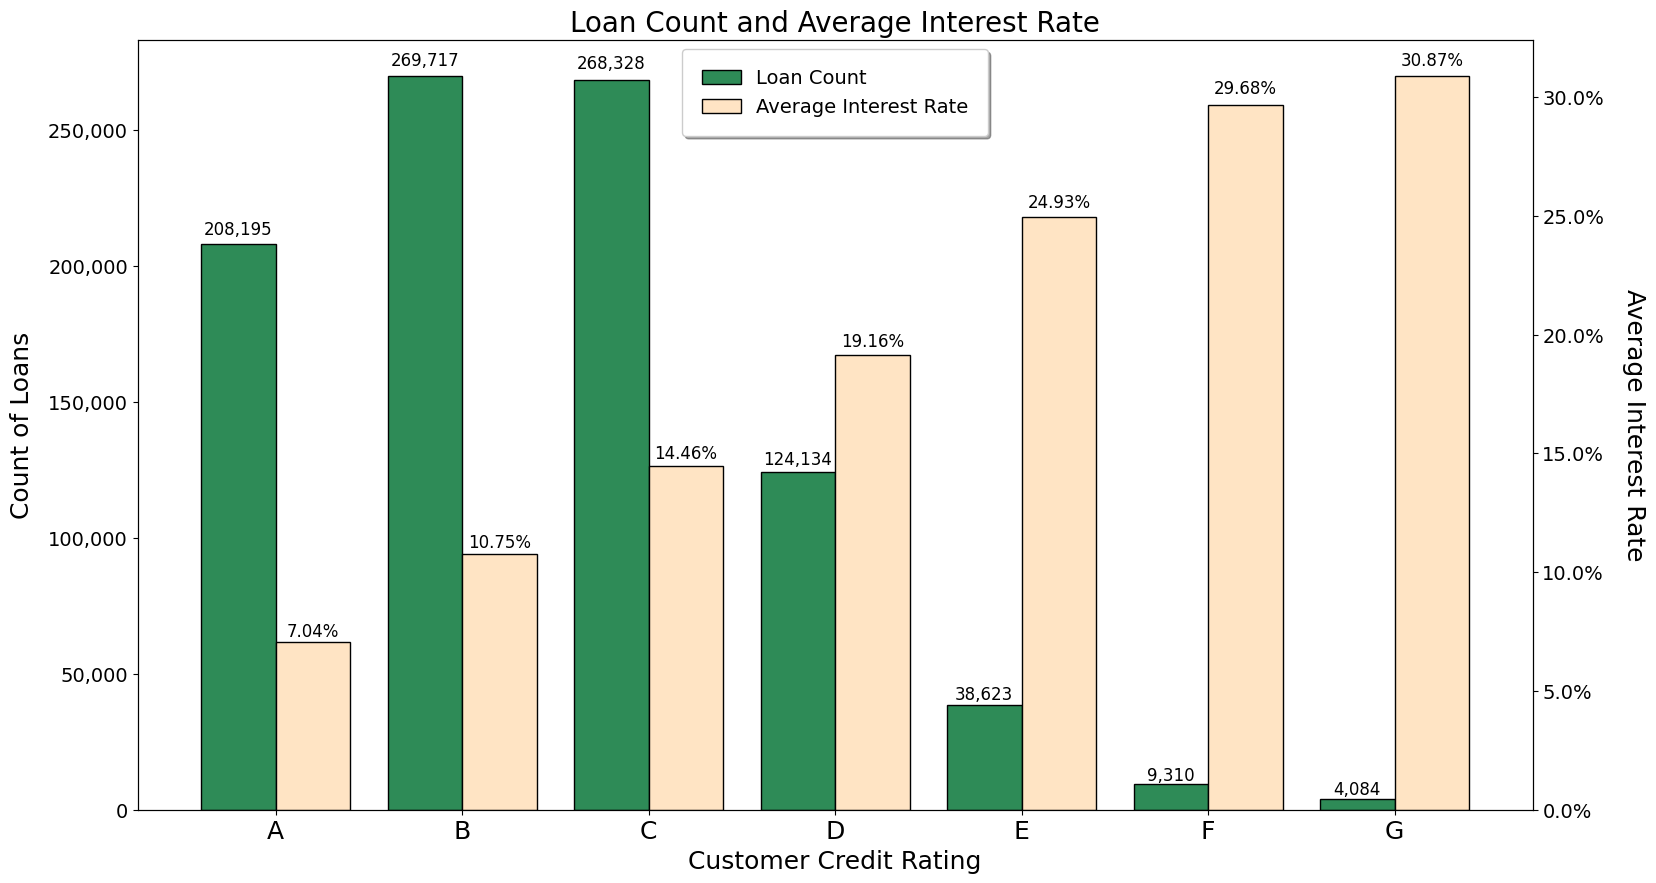

In [18]:
x3.columns = ['Grade','Count', 'TotalLoans', 'AverLoans', 'AverIntRate']

def autolabel(these_bars, this_ax, place_of_decimals, symbol):
    for each_bar in these_bars:
        height = each_bar.get_height()
        this_ax.text(each_bar.get_x()+each_bar.get_width()/2, height*1.01, format(height, place_of_decimals)+symbol,
                    fontsize = 12, color='black', ha='center', va='bottom')

fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()
bar_width = .4

x_pos = np.arange(7)

count_bars = ax1.bar(x_pos-(0.5*bar_width), x2.Count, bar_width, color='seagreen', edgecolor='black', label='Loan Count')
aver_rate_bars = ax2.bar(x_pos+(0.5*bar_width), x2.AverIntRate, bar_width, color='bisque', edgecolor='black', label='Average Interest Rate')

ax1.set_xlabel('Customer Credit Rating', fontsize=18)
ax1.set_ylabel('Count of Loans', fontsize=18, labelpad=10)
ax2.set_ylabel('Average Interest Rate', fontsize=18, rotation=270, labelpad = 30)
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

plt.title('Loan Count and Average Interest Rate', fontsize=20)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(x2.Grade, fontsize=18)

count_color, count_label = ax1.get_legend_handles_labels()
rate_color, rate_label   = ax2.get_legend_handles_labels()
legend = ax1.legend(count_color + rate_color, count_label + rate_label, loc = 'upper center', frameon=True, ncol=1, shadow=True, borderpad=1, fontsize=14)

autolabel(count_bars, ax1, ',.0f', '')
autolabel(aver_rate_bars, ax2, '.2f', '%')

ax1.yaxis.set_major_formatter(('{x:,.0f}'))
ax2.yaxis.set_major_formatter(('{x:,.1f}' + "%"))

plt.show()

In [22]:
df2['issue_d'] = pd.to_datetime(df2['issue_d'])

C:\Users\luz44\AppData\Local\Temp\ipykernel_25856\1362776987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['issue_d'] = pd.to_datetime(df2['issue_d'])


In [23]:
df2['Year'] = df2['issue_d'].dt.year

C:\Users\luz44\AppData\Local\Temp\ipykernel_25856\2951539314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = df2['issue_d'].dt.year


In [24]:
df2['Quarter'] = df2['issue_d'].dt.quarter

C:\Users\luz44\AppData\Local\Temp\ipykernel_25856\1202155125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Quarter'] = df2['issue_d'].dt.quarter


In [25]:
df2['Month'] = df2['issue_d'].dt.month

C:\Users\luz44\AppData\Local\Temp\ipykernel_25856\1133576256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = df2['issue_d'].dt.month


In [26]:
df2['Day'] = df2['issue_d'].dt.day

C:\Users\luz44\AppData\Local\Temp\ipykernel_25856\41492460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Day'] = df2['issue_d'].dt.day


In [27]:
df2['DayOfYear'] = df2['issue_d'].dt.dayofyear

C:\Users\luz44\AppData\Local\Temp\ipykernel_25856\3140105894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DayOfYear'] = df2['issue_d'].dt.dayofyear


In [28]:
df2['MonthName'] = df2['issue_d'].dt.strftime('%b')

C:\Users\luz44\AppData\Local\Temp\ipykernel_25856\3111128811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['MonthName'] = df2['issue_d'].dt.strftime('%b')


In [29]:
df2['WeekDay'] = df2['issue_d'].dt.weekday

C:\Users\luz44\AppData\Local\Temp\ipykernel_25856\2988421117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['WeekDay'] = df2['issue_d'].dt.weekday


In [30]:
df2['DayName'] = df2['issue_d'].dt.strftime('%a')

C:\Users\luz44\AppData\Local\Temp\ipykernel_25856\1379964956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DayName'] = df2['issue_d'].dt.strftime('%a')


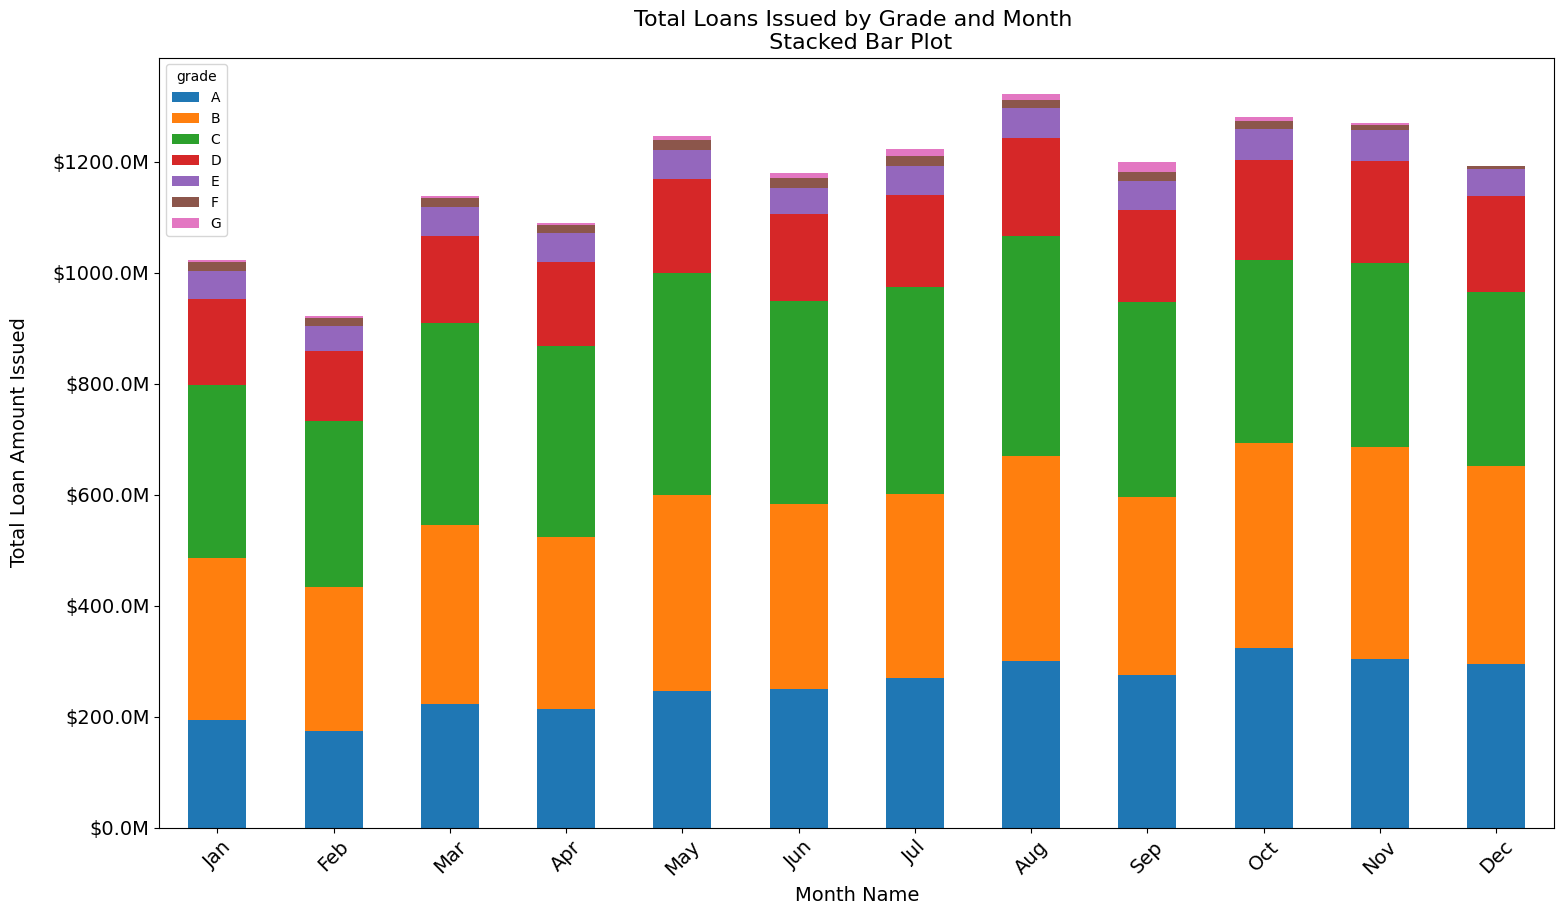

In [40]:
month_sum_df = df2.groupby(['MonthName', 'grade'])['loan_amnt'].sum().reset_index(name='TotalLoans')

month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

month_sum_df = month_sum_df.pivot(index='grade', columns='MonthName', values='TotalLoans')

month_sum_df = month_sum_df.reindex(columns=(month_order))


fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(1,1,1)

month_sum_df.T.plot(kind='bar', stacked=True, ax=ax)


plt.title('Total Loans Issued by Grade and Month \n Stacked Bar Plot', fontsize=16)
plt.ylabel('Total Loan Amount Issued', fontsize=14, labelpad=17)
plt.xticks(rotation=45, horizontalalignment = 'center', fontsize = 14)

plt.yticks(fontsize = 14)

ax.set_xlabel('Month Name', fontsize = 14, labelpad=5)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x,pos: ('$%1.1fM')%(x*1e-6)))


plt.show()

In [41]:
pie_df = df2.groupby(['home_ownership'])['loan_amnt'].count().reset_index(name='TotalLoans')

number_colors = len(pie_df.home_ownership.unique())
color_ref_number = np.arange(number_colors)*3
print(color_ref_number)

[ 0  3  6  9 12]


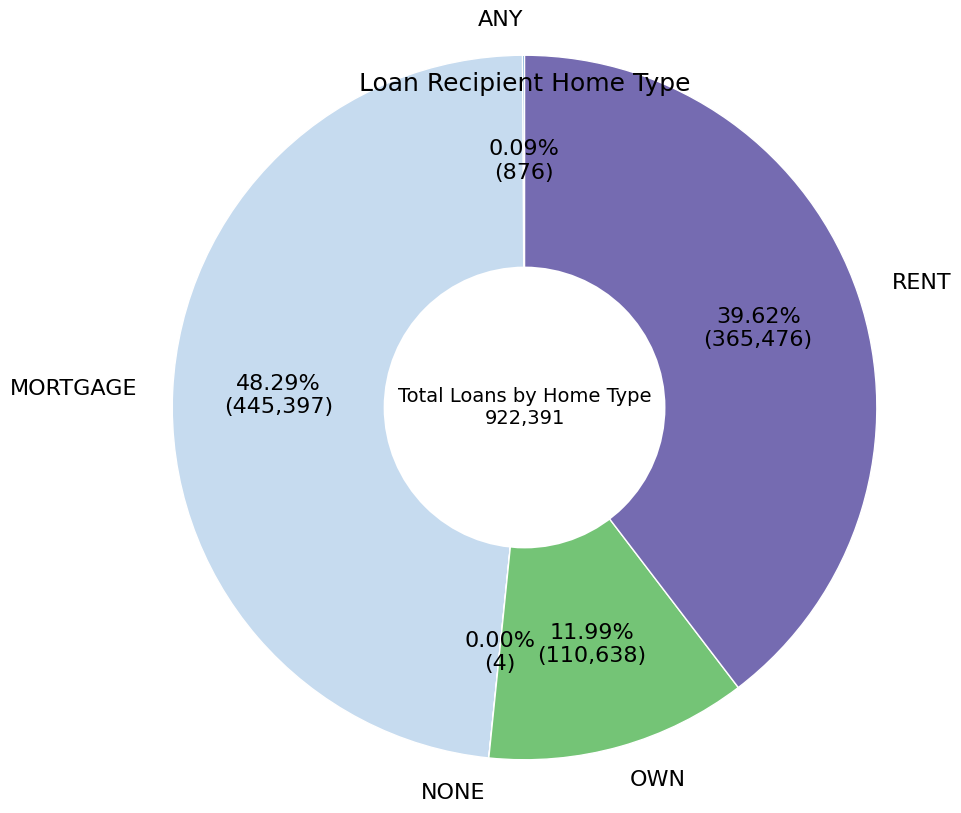

In [46]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

colormap = plt.get_cmap("tab20c")
mycolors = colormap(color_ref_number)

total_loans = pie_df.TotalLoans.sum()


pie_df.groupby(['home_ownership'])['TotalLoans'].sum().plot(
    kind = 'pie', radius = 1, colors = mycolors, pctdistance = .70, labeldistance = 1.1,
    wedgeprops = dict(edgecolor = 'white'),
    textprops = {'fontsize':16},
    autopct = lambda p: '{:.2f}%\n({:,.0f})'.format(p,(p/100)*total_loans),
    startangle = 90)

hole = plt.Circle((0,0), 0.4, fc='white')
fig1 = plt.gcf()
fig1.gca().add_artist(hole)

ax.text(0,0, 'Total Loans by Home Type\n' + str(('{:,}'.format(total_loans))), ha='center', va='center', fontsize = 14)

ax.axis('equal')

ax.yaxis.set_visible(False)
plt.title("Loan Recipient Home Type", fontsize = 18, x=.5, y=.9)
plt.show()


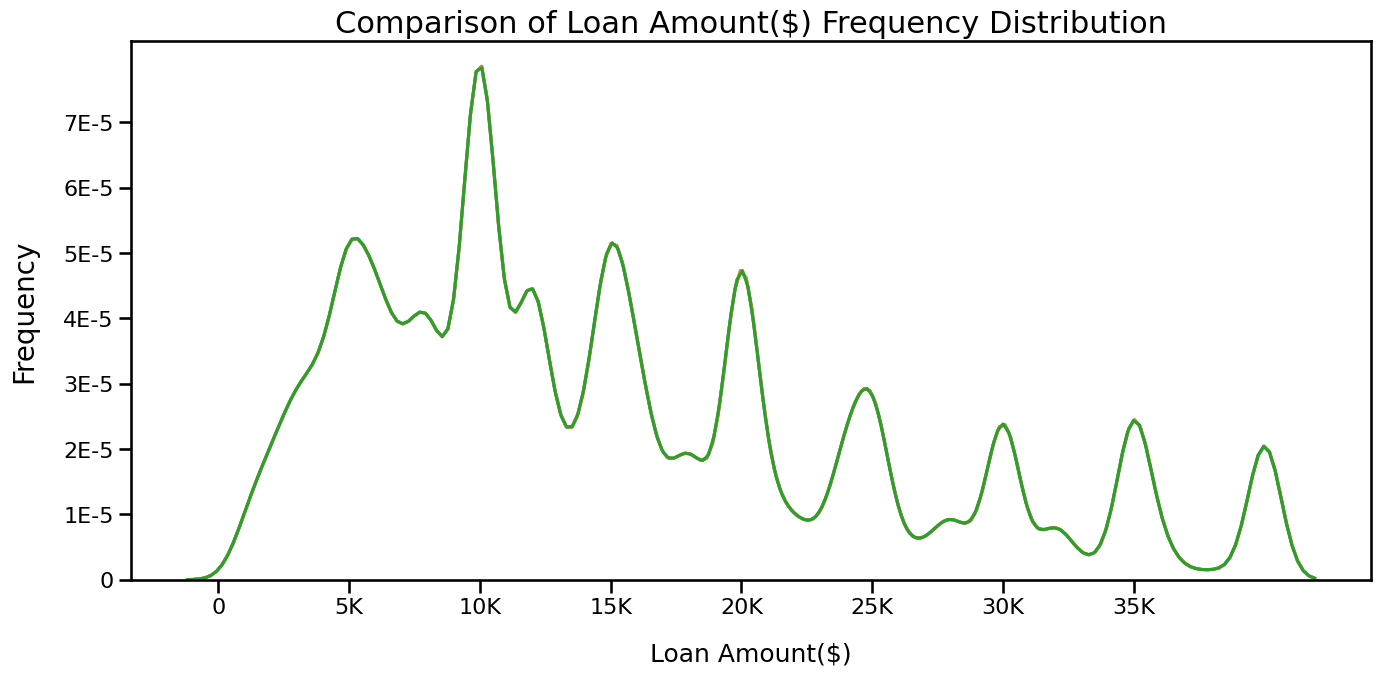

In [48]:
import seaborn as sns
sns.set_context("talk")
plt.figure(figsize=(16,7))
plt.title('Comparison of Loan Amount($) Frequency Distribution', fontsize=22)
plt.xticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], [0, '5K', '10K', '15K', '20K', '25K', '30K', '35K'], fontsize=16)
plt.yticks([0, 0.00001, 0.00002, 0.00003, 0.00004, 0.00005, 0.00006, 0.00007], [0, '1E-5', '2E-5', '3E-5', '4E-5', '5E-5', '6E-5', '7E-5'], fontsize=16)
sns.kdeplot(df["loan_amnt"], label='Loan Applied by the Borrower')
sns.kdeplot(df["funded_amnt"], label='Amount Funded by the Lender')
sns.kdeplot(df["funded_amnt_inv"], label='Total Committed by the Investor')
plt.xlabel('Loan Amount($)', labelpad=18, fontsize=18)
plt.ylabel('Frequency', labelpad=18, fontsize=20);

In [55]:
df.describe().head(4)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,937785.000000,937785.000000,937785.000000,937785.000000,937785.000000,937785.000000,936143.000000,937785.000000,937785.000000,937785.000000,...,937785.000000,937785.000000,937785.000000,937785.000000,937785.0,937785.000000,937785.000000,937785.000000,937785.000000,937785.000000
mean,15470.038602,15470.038602,15466.277238,12.971088,455.287104,80092.179863,19.460818,0.274627,0.472796,11.559665,...,40.217774,6.858548,2249.049240,0.020073,1.0,0.002127,0.007758,7.736853,0.130296,0.032920
std,9918.890683,9918.890683,9917.697337,5.174798,285.361965,154452.492467,19.106405,0.829359,0.761867,5.869997,...,383.524513,66.900063,5378.688703,0.156424,0.0,0.048772,0.099469,579.916143,0.353210,0.310534
min,1000.000000,1000.000000,725.000000,5.310000,7.610000,0.000000,-1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000


C:\Users\luz44\AppData\Local\Temp\ipykernel_25856\437806266.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['int_rate'], bins= 30,ax=ax1)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Interest Rate Distribution, Loan range based on the Loan Amount , General Interest rate


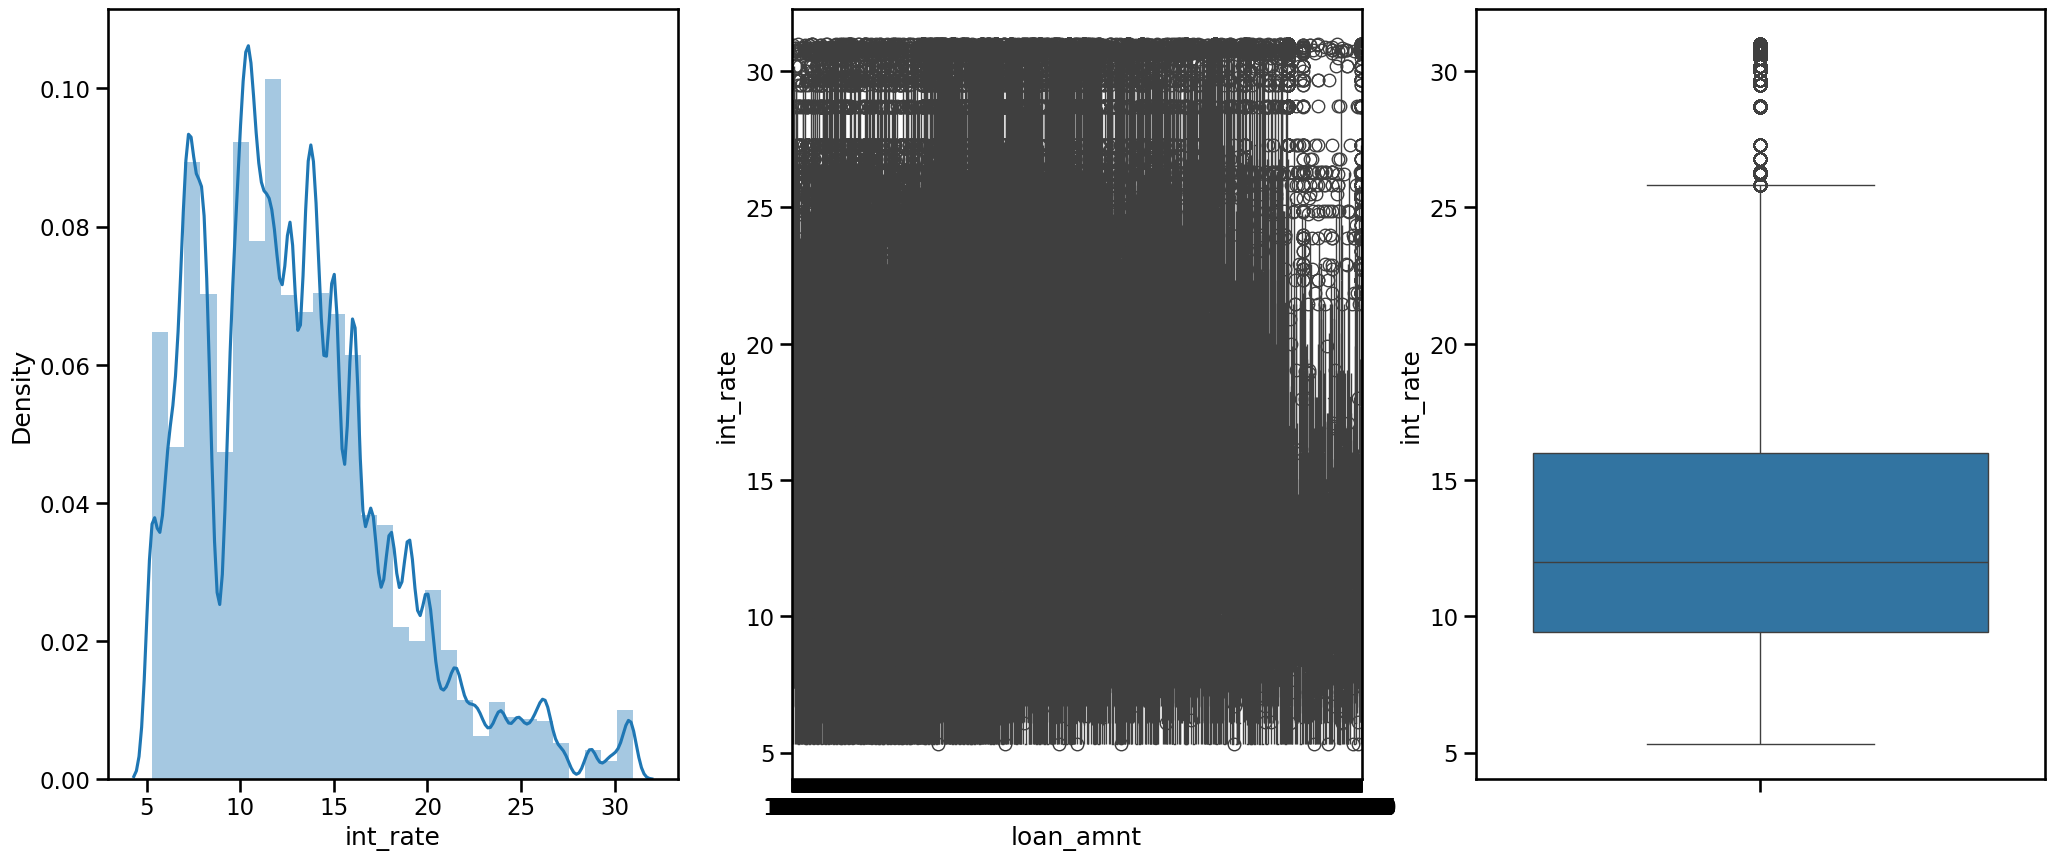

In [63]:
f,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(25,10))
sns.distplot(df['int_rate'], bins= 30,ax=ax1)
sns.boxplot(data =df, x ='loan_amnt', y= df['int_rate'],ax=ax2).legend().set_visible(False)
sns.boxplot(data = df['int_rate'], ax=ax3)
print("Interest Rate Distribution, Loan range based on the Loan Amount , General Interest rate")

Interest rate - Grade 


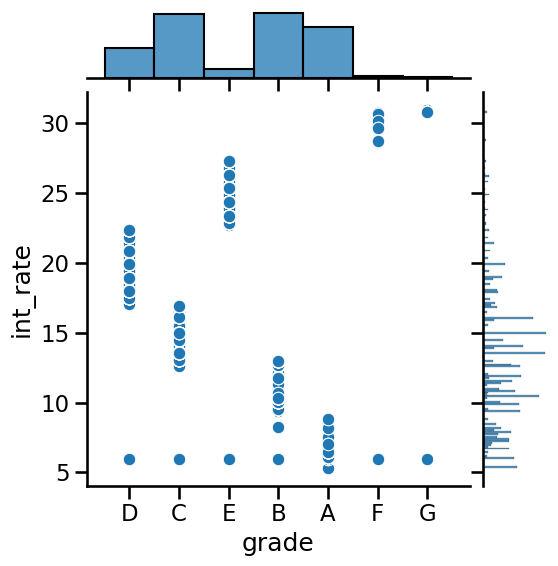

In [64]:
#Finding Relationship between grade ~ interest rate ~ installment 
sns.jointplot(y='int_rate', x='grade',data= df)
print("Interest rate - Grade ")

In [71]:
df.head()

,issue_d,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,2017-01-01,5000,5000,5000.0,36 months,17.99,180.74,D,D2,RENT,...,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,Y
1,2017-01-01,25000,25000,25000.0,60 months,12.74,565.51,C,C1,MORTGAGE,...,1,Joint App,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2,2017-01-01,19800,19800,19800.0,36 months,22.74,763.78,E,E1,RENT,...,1,Individual,0.0,0.0,0.0,1.0,0.0,N,Cash,N
3,2017-01-01,10000,10000,10000.0,36 months,11.44,329.48,B,B4,RENT,...,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,2017-01-01,1000,1000,1000.0,36 months,12.74,33.57,C,C1,MORTGAGE,...,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N


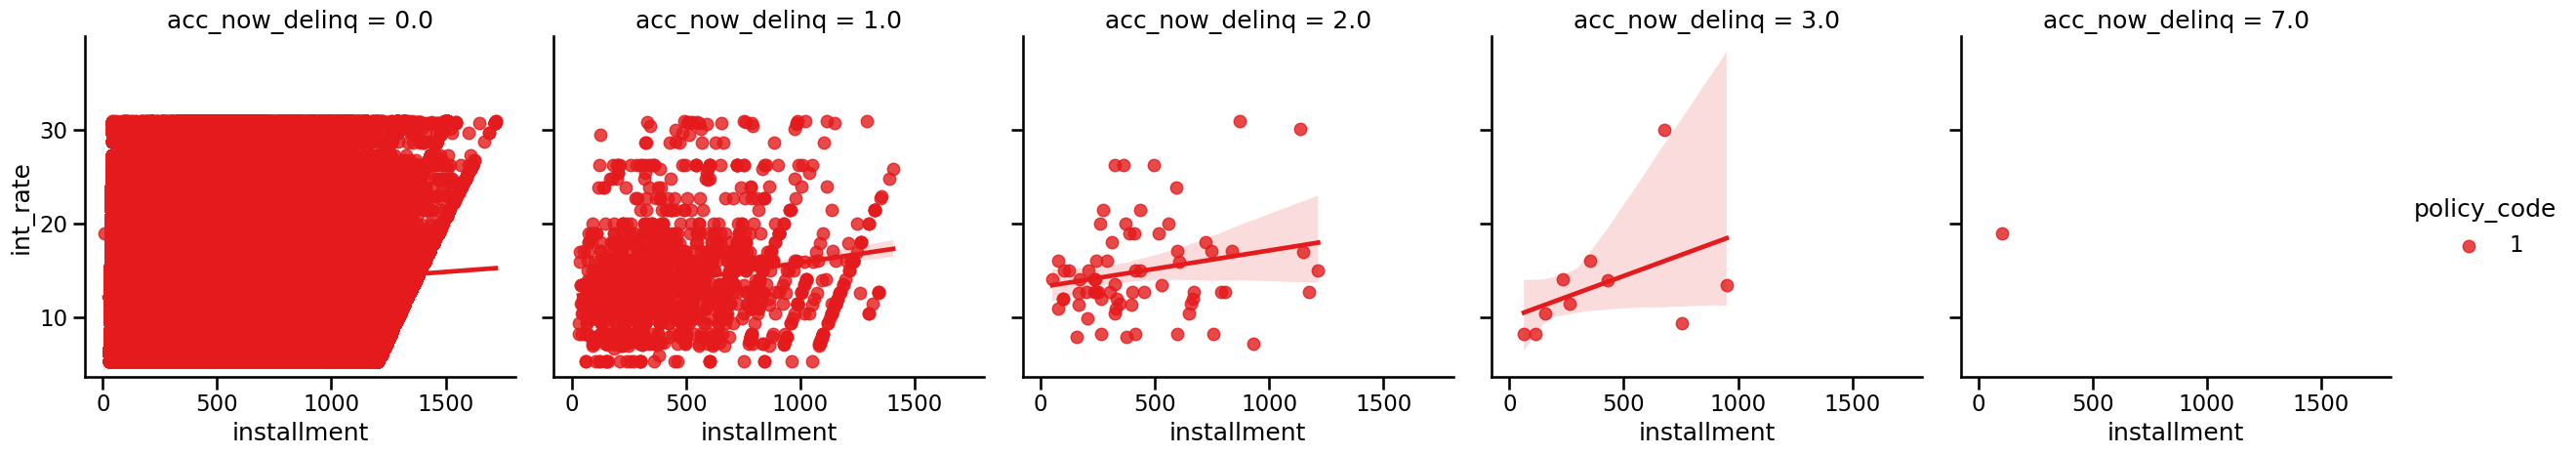

In [73]:
sns.lmplot(data=df,palette='Set1',x='installment',y='int_rate', hue='policy_code',col='acc_now_delinq')